In [1]:
import sys
import tensorflow as tf
import numpy as np

In [2]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


5


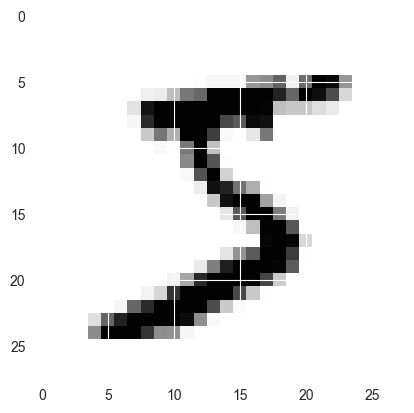

In [3]:
# MNIST 데이터를 시각화하기 
import matplotlib.pyplot as plt
print(Y_train[0])
plt.imshow(X_train[0], cmap='Greys') # 흑백 이미지로 확인
plt.show()

In [4]:
# 데이터를 직접 들여다보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [5]:
# MLP 구조에 적절한 input의 형태로 변형하기
## reshape()을 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') # 28 x 28= 784
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

In [6]:
# Label 값을 One-hot encoding 하기 
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [7]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# perceptron에서 나온 출력을 확률 값으로 만들기 위해 활성화 함수로 softmax를 사용해야 함

# 모델 설계하기 
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# 모델의 loss 함수, optimizer, metric을 설정하고 모델을 compile하기
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

In [10]:
# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())

Epoch 1/30
48/48 [==============================] - 1s 16ms/step - loss: 19.7670 - categorical_accuracy: 0.7665 - val_loss: 1.4030 - val_categorical_accuracy: 0.9112
Epoch 2/30
48/48 [==============================] - 1s 13ms/step - loss: 0.9919 - categorical_accuracy: 0.9211 - val_loss: 0.7397 - val_categorical_accuracy: 0.9301
Epoch 3/30
48/48 [==============================] - 1s 13ms/step - loss: 0.4827 - categorical_accuracy: 0.9453 - val_loss: 0.6153 - val_categorical_accuracy: 0.9328
Epoch 4/30
48/48 [==============================] - 1s 13ms/step - loss: 0.2766 - categorical_accuracy: 0.9600 - val_loss: 0.5085 - val_categorical_accuracy: 0.9404
Epoch 5/30
48/48 [==============================] - 1s 13ms/step - loss: 0.1638 - categorical_accuracy: 0.9719 - val_loss: 0.4811 - val_categorical_accuracy: 0.9432
Epoch 6/30
48/48 [==============================] - 1s 13ms/step - loss: 0.1006 - categorical_accuracy: 0.9802 - val_loss: 0.4442 - val_categorical_accuracy: 0.9451
Epoch 7/3

In [11]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

[19.766979217529297, 0.9919335842132568, 0.4827270209789276, 0.2766221761703491, 0.16377098858356476, 0.10064955800771713, 0.05575808882713318, 0.03555804863572121, 0.018053913488984108, 0.010198836214840412, 0.004512864630669355, 0.0022452492266893387, 0.0012065288610756397, 0.0007248962647281587, 0.0005708113312721252, 0.0004970676964148879, 0.0004478784103412181, 0.0003995302249677479, 0.0003717664221767336, 0.0003417561820242554, 0.0003173484292346984, 0.0002951193309854716, 0.00027706005494110286, 0.00026249312213622034, 0.000245667906710878, 0.0002325048262719065, 0.0002193387335864827, 0.0002076693926937878, 0.0001968503202078864, 0.00018735576304607093]


In [12]:
# Q. Validation loss를 확인해 보세요.
val_loss = history.history['val_loss']
print(val_loss)

[1.402961254119873, 0.7397336959838867, 0.61529940366745, 0.5084863901138306, 0.4811148941516876, 0.4442272484302521, 0.44340312480926514, 0.4163699448108673, 0.40893200039863586, 0.41406145691871643, 0.4095349907875061, 0.4038337767124176, 0.40147659182548523, 0.4008110761642456, 0.4004555642604828, 0.40053030848503113, 0.400053471326828, 0.40019237995147705, 0.39967215061187744, 0.39964038133621216, 0.3993871808052063, 0.3994666039943695, 0.39953699707984924, 0.3993966579437256, 0.3993069529533386, 0.39883020520210266, 0.3991873860359192, 0.39917880296707153, 0.39926066994667053, 0.3991232216358185]


In [13]:
# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 0s 961us/step - loss: 0.4396 - categorical_accuracy: 0.9513

 Test Accuracy: 0.9513


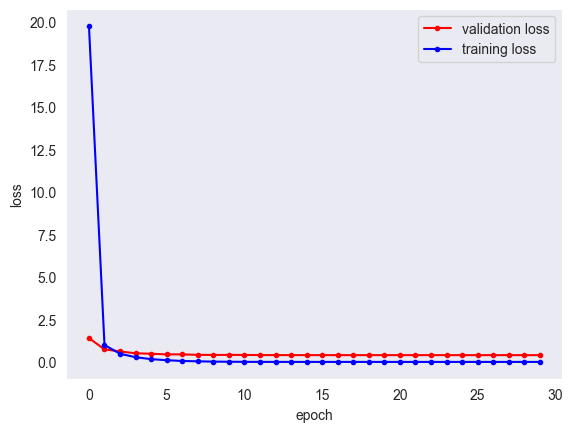

In [14]:
# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### 모델에 임의의 변화주기

In [15]:
# 모델 설계하기 
input_layer = tf.keras.layers.Input(shape=(784,))
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) 
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.

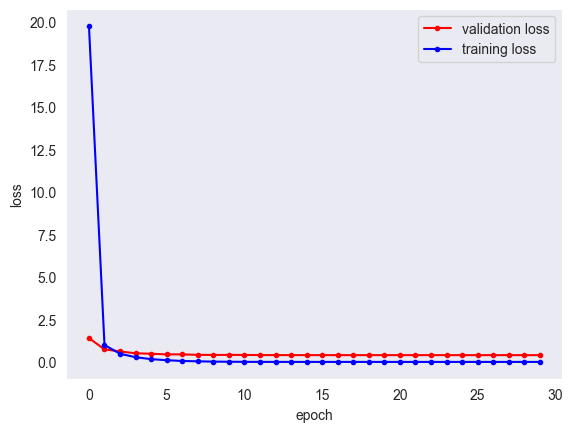

In [16]:
# 시각화
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()